# Unraveling the Balance: Depth vs. Width in CNN Architectures

### Student name: Yatish Chandra Sai Udutha
### Student ID: 23030677

###### Please run the ipynb file in the GPU to get faster results.

# IMPORTING THE NECESSARY MODULES

In [3]:
# Importing the necessary modules
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
import random
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOADING THE DATA

In [4]:
# Load the dataset directly
# Make sure there is internet to load the CIFAR 10 data
# The target variables are converted into categorical
random.seed(27)
np.random.seed(27)
set_seed(27)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)  # converted into categorical
y_test = to_categorical(y_test, 10) # converted into categorical
x_train, x_test = x_train / 255.0, x_test / 255.0  # the data is normalized.
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
#print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


# CNN MODEL CREATION WITH RESPECT TO DEPTH

In [5]:
# Function to build CNN with varying depth
# In this function the the number of filter is constant i.e., 32.
# The input image shape is (32,32,3)
# the output layer is 10 based on classification types.
# metrics used is accuracy and optimizer is adam
def build_model(num_layers):
    """
    Builds a Convolutional Neural Network (CNN) model with the specified number of layers.

    Parameters:
        num_layers (int): Number of convolutional layers in the model.
                         Must be at least 1.

    Returns:
        model (Sequential): Compiled CNN model ready for training.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))   # Max pooling layer
    for i in range(num_layers - 1):
        model.add(Conv2D(32, (3, 3), activation='relu'))  #  convolutional layer
    model.add(Flatten())  #Flatten the features
    model.add(Dense(128, activation='relu'))   # Fully connected layer
    model.add(Dense(10, activation='softmax'))   #output layer is 10
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# TRAINING THE DATA
### EVALUATING THE RESULTS

In [6]:
# Train and evaluate models with different depths
# The varying depths are used till 8.
# time function is used to check the training time for each depth.
# Depth results are stored in a dictionary for the training time plot.

depth_training_times = []
depth_results ={}
depths = [2,3, 6,7, 8]

for depth in depths:
    model = build_model(depth)
    start_time = time.time()
    # Fitting the model on train and validation
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    end_time = time.time()
    depth_training_times.append(end_time - start_time) # Time is appended
    # Printing the results
    print(f"Depth {depth}: Test accuracy = {max(history.history['val_accuracy'])}")
    # Evaluating the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    depth_results[depth] = test_acc

    save_path = '/content/drive/My Drive/cnn_depth_'+str(depth)+'_cifar10_model.h5'
    # Save the model in Google Drive
    model.save(save_path)
    print(f"Model saved to {save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3937 - loss: 1.6657 - val_accuracy: 0.5917 - val_loss: 1.1413
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6044 - loss: 1.1134 - val_accuracy: 0.6438 - val_loss: 1.0228
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6647 - loss: 0.9535 - val_accuracy: 0.6524 - val_loss: 1.0218
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7026 - loss: 0.8409 - val_accuracy: 0.6560 - val_loss: 1.0164
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7403 - loss: 0.7429 - val_accuracy: 0.6602 - val_loss: 1.0202
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7754 - loss: 0.6518 - val_accuracy: 0.6517 - val_loss: 1.0800
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8009 - loss: 0.5757 - val_accuracy: 0.6280 - val_loss: 1.2119
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8195 - loss: 0.5179 

Model saved to /content/drive/My Drive/cnn_depth_2_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3878 - loss: 1.6811 - val_accuracy: 0.5773 - val_loss: 1.1720
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5904 - loss: 1.1595 - val_accuracy: 0.6258 - val_loss: 1.0605
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6538 - loss: 0.9768 - val_accuracy: 0.6399 - val_loss: 1.0340
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7024 - loss: 0.8455 - val_accuracy: 0.6514 - val_loss: 1.0444
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7425 - loss: 0.7339 - val_accuracy: 0.6521 - val_loss: 1.0841
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7741 - loss: 0.6453 - val_accuracy: 0.6523 - val_loss: 1.1343
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7985 - loss: 0.5713 - val_accuracy: 0.6502 - val_loss: 1.2437
Epoch 8/10
1563/156

Model saved to /content/drive/My Drive/cnn_depth_3_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2639 - loss: 1.9343 - val_accuracy: 0.4847 - val_loss: 1.4313
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4926 - loss: 1.3962 - val_accuracy: 0.5409 - val_loss: 1.2866
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5523 - loss: 1.2405 - val_accuracy: 0.5817 - val_loss: 1.1725
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5958 - loss: 1.1283 - val_accuracy: 0.6038 - val_loss: 1.1374
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6195 - loss: 1.0614 - val_accuracy: 0.6097 - val_loss: 1.1114
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6409 - loss: 1.0054 - val_accuracy: 0.6185 - val_loss: 1.1073
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6610 - loss: 0.9520 - val_accuracy: 0.6232 - val_loss: 1.1039
Epoch 8/10
1563/156

Model saved to /content/drive/My Drive/cnn_depth_6_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2628 - loss: 1.9247 - val_accuracy: 0.4595 - val_loss: 1.4627
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4698 - loss: 1.4472 - val_accuracy: 0.5392 - val_loss: 1.2840
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5372 - loss: 1.2784 - val_accuracy: 0.5758 - val_loss: 1.1847
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5759 - loss: 1.1747 - val_accuracy: 0.5887 - val_loss: 1.1618
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6019 - loss: 1.1076 - val_accuracy: 0.5903 - val_loss: 1.1890
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6223 - loss: 1.0609 - val_accuracy: 0.6180 - val_loss: 1.1003
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6417 - loss: 1.0057 - val_accuracy: 0.6140 - val_loss: 1.1099
Epoch 8/10
1563/1563

Model saved to /content/drive/My Drive/cnn_depth_7_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2478 - loss: 1.9504 - val_accuracy: 0.4212 - val_loss: 1.5358
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4477 - loss: 1.4938 - val_accuracy: 0.5072 - val_loss: 1.3610
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5215 - loss: 1.3120 - val_accuracy: 0.5544 - val_loss: 1.2456
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5624 - loss: 1.2019 - val_accuracy: 0.5789 - val_loss: 1.1832
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5907 - loss: 1.1368 - val_accuracy: 0.5791 - val_loss: 1.2071
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6124 - loss: 1.0767 - val_accuracy: 0.6011 - val_loss: 1.1525
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6332 - loss: 1.0280 - val_accuracy: 0.6207 - val_loss: 1.0881
Epoch 8/10
1563/156

Model saved to /content/drive/My Drive/cnn_depth_8_cifar10_model.h5


# CNN MODEL CREATION WITH RESPECT TO WIDTH

In [7]:
# Function to build CNN with varying width
# The depth of the model is fixed to 6 layers and only 2 conv layers are used.
# the Output layer is with 10 neurons which matches the target variable classes.
# The max pooling layer is used for overfitting control
# Metric such as accuracy is used for model evaluation

def build_model(num_filters):

    """
    Builds a Convolutional Neural Network (CNN) model with the specified number of filters
    for each layer.

    Parameters:
        num_filters (int): Number of filters in each layer in the model.
                         Must be at least 1.

    Returns:
        model (Sequential): Compiled CNN model ready for training.
    """

    model = Sequential()
    # Adding the convolutional layers for feature extraction
    model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(num_filters, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))  # Max pooling layer to reduce overfitting
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax')) # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# TRAINING THE MODEL
### EVALUATING THE MODEL

In [8]:
# Train and evaluate models with different widths
# The varying width are used till 256.
# Memory size is calculated to check the memory usage for each width.
# width results are stored in a dictionary for the Model size plot.

width_model_sizes = []
width_results = {}
widths = [16, 32, 64, 128,256]

for width in widths:
    # Calling the model
    model = build_model(width)
    # memory size is calculated.
    param_count = model.count_params()
    size_in_mb = param_count * 4 / (1024 ** 2)
    width_model_sizes.append(size_in_mb) #different memory sizes are appended
    # Fitting the model
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    # Printing the results
    print(f"Width {width}: Test accuracy = {max(history.history['val_accuracy'])}")
    # Evaluating the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    width_results[width] = test_acc

    save_path = '/content/drive/My Drive/cnn_width_'+str(width)+'_cifar10_model.h5'
    # Save the model in Google Drive
    model.save(save_path)
    print(f"Model saved to {save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4092 - loss: 1.6481 - val_accuracy: 0.5786 - val_loss: 1.1838
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5963 - loss: 1.1456 - val_accuracy: 0.6276 - val_loss: 1.0572
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6544 - loss: 0.9870 - val_accuracy: 0.6435 - val_loss: 1.0170
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6901 - loss: 0.8820 - val_accuracy: 0.6496 - val_loss: 1.0231
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7230 - loss: 0.7949 - val_accuracy: 0.6416 - val_loss: 1.0545
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7537 - loss: 0.7157 - val_accuracy: 0.6334 - val_loss: 1.1154
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7786 - loss: 0.6425 - val_accuracy: 0.6289 - val_loss: 1.1884
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8033 - loss: 0.5751 -

Model saved to /content/drive/My Drive/cnn_width_16_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3955 - loss: 1.6678 - val_accuracy: 0.5736 - val_loss: 1.1953
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6007 - loss: 1.1269 - val_accuracy: 0.6290 - val_loss: 1.0628
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6796 - loss: 0.9159 - val_accuracy: 0.6425 - val_loss: 1.0332
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7289 - loss: 0.7791 - val_accuracy: 0.6525 - val_loss: 1.0416
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7683 - loss: 0.6644 - val_accuracy: 0.6373 - val_loss: 1.1252
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8042 - loss: 0.5688 - val_accuracy: 0.6111 - val_loss: 1.3432
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8348 - loss: 0.4774 - val_accuracy: 0.6186 - val_loss: 1.4335
Epoch 8/10
1563/156

Model saved to /content/drive/My Drive/cnn_width_32_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.4309 - loss: 1.5771 - val_accuracy: 0.6260 - val_loss: 1.0479
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6501 - loss: 0.9993 - val_accuracy: 0.6653 - val_loss: 0.9681
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7194 - loss: 0.8101 - val_accuracy: 0.6733 - val_loss: 0.9973
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7767 - loss: 0.6494 - val_accuracy: 0.6607 - val_loss: 1.1114
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8205 - loss: 0.5170 - val_accuracy: 0.6333 - val_loss: 1.3480
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8615 - loss: 0.4015 - val_accuracy: 0.6141 - val_loss: 1.5960
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8837 - loss: 0.3243 - val_accuracy: 0.6149 - val_loss: 1.8267
Epoch 8/10
1563/15

Model saved to /content/drive/My Drive/cnn_width_64_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.4332 - loss: 1.5678 - val_accuracy: 0.6270 - val_loss: 1.0473
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6610 - loss: 0.9699 - val_accuracy: 0.6600 - val_loss: 0.9728
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7352 - loss: 0.7620 - val_accuracy: 0.6619 - val_loss: 1.0377
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7958 - loss: 0.5909 - val_accuracy: 0.6375 - val_loss: 1.3007
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8374 - loss: 0.4541 - val_accuracy: 0.6363 - val_loss: 1.4684
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8772 - loss: 0.3436 - val_accuracy: 0.6496 - val_loss: 1.6582
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9035 - loss: 0.2719 - val_accuracy: 0.6322 - val_loss: 1.9221
Epoch 8/10
15

Model saved to /content/drive/My Drive/cnn_width_128_cifar10_model.h5
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.4224 - loss: 1.6076 - val_accuracy: 0.6247 - val_loss: 1.0617
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 21ms/step - accuracy: 0.6430 - loss: 1.0231 - val_accuracy: 0.6553 - val_loss: 0.9915
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7024 - loss: 0.8470 - val_accuracy: 0.6618 - val_loss: 1.0091
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.7610 - loss: 0.6907 - val_accuracy: 0.6536 - val_loss: 1.1101
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8064 - loss: 0.5583 - val_accuracy: 0.6455 - val_loss: 1.2605
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8438 - loss: 0.4476 - val_accuracy: 0.6288 - val_loss: 1.4522
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8729 - loss: 0.3640 - val_accuracy: 0.6207 - val_loss: 1.7179
Epoch 

Model saved to /content/drive/My Drive/cnn_width_256_cifar10_model.h5


# Visualizing the results

### Model accuracy with respect to depth and width

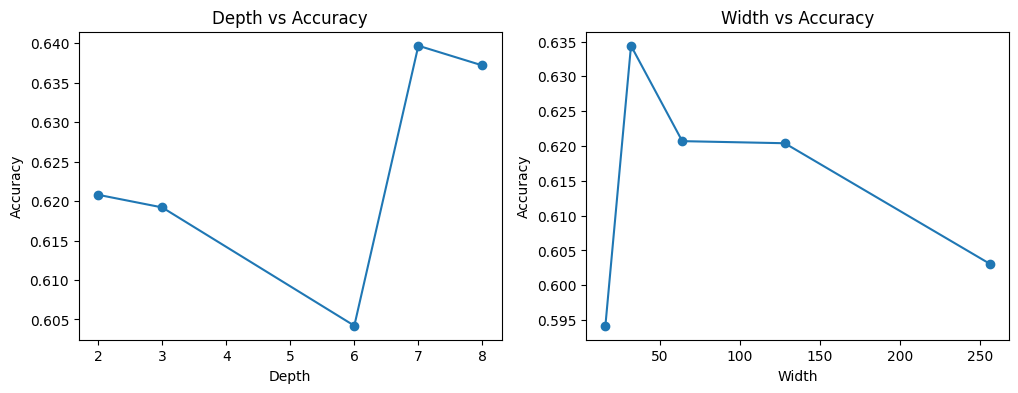

In [21]:
# The results are displyed in subplots.
# The depth vs accuracy plot tells that accuracy is high for depth = 3
# For remaining depths the accuracy is reduced.

plt.figure(figsize=(12, 4))  # Figure size
plt.subplot(1, 2, 1)
plt.plot(depths, list(depth_results.values()), marker='o')
plt.title('Depth vs Accuracy')  # Title creation
plt.xlabel('Depth')  # X label
plt.ylabel('Accuracy')  # y -label

# The Width vs accuracy plot tells that accuracy is high for width = 50
# For remaining widths the accuracy is reduced.

plt.subplot(1, 2, 2)
plt.plot(widths, list(width_results.values()), marker='o')
plt.title('Width vs Accuracy') # Title creation
plt.xlabel('Width')  #X label
plt.ylabel('Accuracy')  # Y label
plt.show()

### Training time vs Depth & Model size vs width Analysis

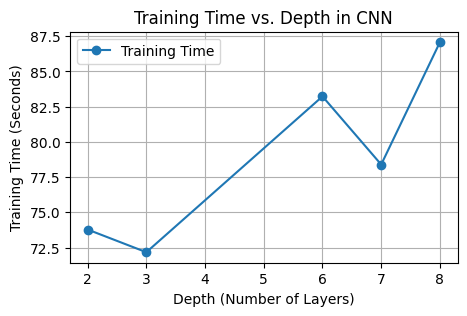

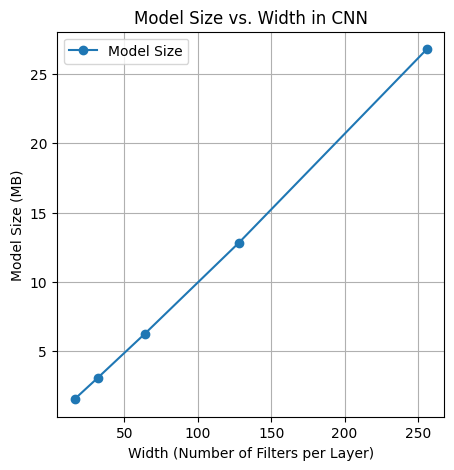

In [10]:
# Plot Training Time vs Depth
# Training time vs Depth analysis shows that the training time is less for depth =3
# For the rest of the depts the training time is varying.
plt.figure(figsize=(5, 3))

plt.plot(depths, depth_training_times, marker='o', label="Training Time")
plt.title("Training Time vs. Depth in CNN")  # Title creation
plt.xlabel("Depth (Number of Layers)")  # X label
plt.ylabel("Training Time (Seconds)")  # Y label
plt.grid(True)
plt.legend()
plt.show()

# Plot Model Size vs Width
# Model size vs Width analysis shows that the model size and width are in linear relationship.

plt.figure(figsize=(5, 5))
plt.plot(widths, width_model_sizes, marker='o', label="Model Size")
plt.title("Model Size vs. Width in CNN")  # Title creation
plt.xlabel("Width (Number of Filters per Layer)")  # X label
plt.ylabel("Model Size (MB)")  # Y label
plt.grid(True)
plt.legend()
plt.show()


# Final Model

In [27]:
# The model is created with the best parameters from the above models.
# The parameters are depth =3 and width = 50
# the input size is maintained the same.

def build_cnn(num_layers=3, num_filters=50):

    """
    Builds a Convolutional Neural Network (CNN) model with the specified number of filters
    for each layer and specified number of layers.

    Parameters:
        num_layers (int): Number of convolutional layers in the model.
                         Must be at least 1.
        num_filters (int): Number of filters in each layer in the model.
                         Must be at least 1.

    Returns:
        model (Sequential): Compiled CNN model ready for training.
    """

    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    for _ in range(num_layers - 1):  # Add layers based on depth
        model.add(Conv2D(num_filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))  # Maxpooling layer
    model.add(Flatten())  # Flattening the features
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Training the model
### Evaluating the results

In [28]:
final_model = build_cnn()
history = final_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

print('Test accuracy:',max(history.history['val_accuracy']))
test_loss, test_acc = final_model.evaluate(x_test, y_test, verbose=0)

save_final_path = '/content/drive/My Drive/best_model_cifar10_model.h5'
# Save the model in Google Drive
final_model.save(save_final_path)
print(f"Model saved to {save_final_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3993 - loss: 1.6476 - val_accuracy: 0.6170 - val_loss: 1.0655
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6395 - loss: 1.0224 - val_accuracy: 0.6791 - val_loss: 0.9112
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7087 - loss: 0.8362 - val_accuracy: 0.6899 - val_loss: 0.8819
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7506 - loss: 0.7225 - val_accuracy: 0.6911 - val_loss: 0.8947
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7797 - loss: 0.6289 - val_accuracy: 0.6959 - val_loss: 0.9177
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8066 - loss: 0.5550 - val_accuracy: 0.6964 - val_loss: 0.9678
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8284 - loss: 0.4917 - val_accuracy: 0.6796 - val_loss: 1.0789
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8472 - loss: 0.4369 

Model saved to /content/drive/My Drive/best_model_cifar10_model.h5


# Loss and Accuracy Graphs

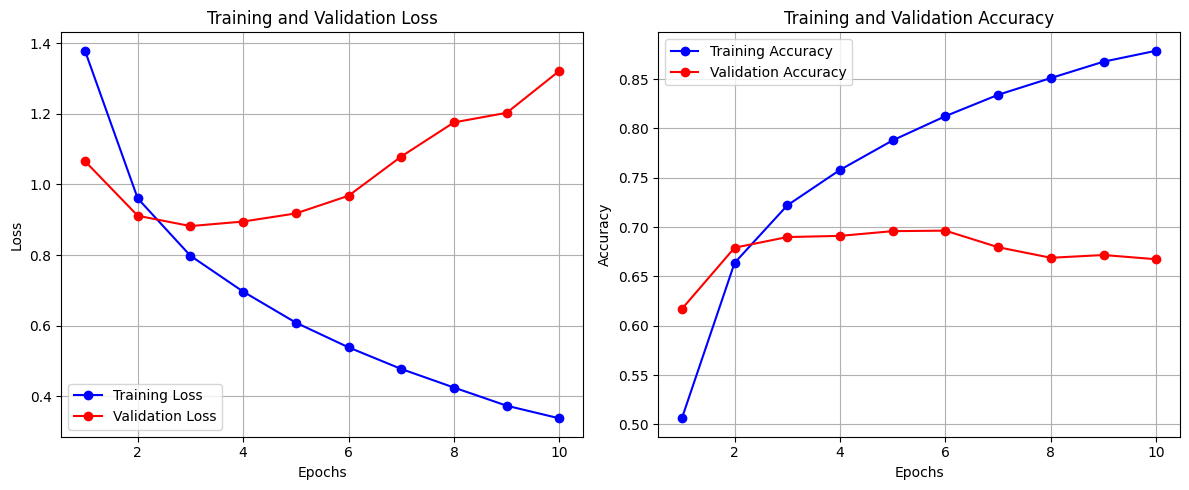

In [29]:
# Extract metrics
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot Training and Validation Loss
# From the loss plot it is clear that training loss is decreasing
# that means training is performed well on train data
# In validation loss the line is decreasing till 4 epoch and then increased
# further. There is overfitting in the model.

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # subplots size
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')   # X labels
plt.ylabel('Loss')  #y label
plt.legend()
plt.grid(True)

# Plot Training and Validation Accuracy
# Same in this plot as well. There is overfitting because the curves deviate
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # X label
plt.ylabel('Accuracy')  # y label
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# To get the same results from the previously saved models

In [25]:
from tensorflow.keras.models import load_model

depth_results_1 ={}
depths = [2,3, 6,7, 8]
# Load the saved model
for d in depths:
  load = '/content/drive/My Drive/cnn_depth_'+str(d)+'_cifar10_model.h5'
  loaded_model = load_model(load)
  print(f"Model for depth {d} loaded successfully!")

  # Evaluate the model on the test data
  test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
  depth_results_1[d] = test_accuracy
  print(f"Test Loss: {test_loss:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")



width_model_sizes = []
width_results_1 = {}
widths = [16, 32, 64, 128,256]

for w in widths:
  load = '/content/drive/My Drive/cnn_width_'+str(w)+'_cifar10_model.h5'
  loaded_model_1 = load_model(load)
  print(f"Model for Width {w} loaded successfully!")

    # Evaluating the model
  test_loss_1, test_acc_1 = loaded_model_1.evaluate(x_test, y_test, verbose=0)
  width_results_1[w] = test_acc_1
  print(f"Test Loss: {test_loss_1:.4f}")
  print(f"Test Accuracy: {test_acc_1:.4f}")

Model for depth 2 loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6208 - loss: 1.6014
Test Loss: 1.5823
Test Accuracy: 0.6208


Model for depth 3 loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6210 - loss: 1.5807


Test Loss: 1.6039
Test Accuracy: 0.6192
Model for depth 6 loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6076 - loss: 1.2218


Test Loss: 1.2289
Test Accuracy: 0.6042
Model for depth 7 loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6392 - loss: 1.0746


Test Loss: 1.0786
Test Accuracy: 0.6397
Model for depth 8 loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6400 - loss: 1.0469
Test Loss: 1.0494
Test Accuracy: 0.6372


Model for Width 16 loaded successfully!
Test Loss: 1.5432
Test Accuracy: 0.5942


Model for Width 32 loaded successfully!
Test Loss: 1.8713
Test Accuracy: 0.6344


Model for Width 64 loaded successfully!
Test Loss: 2.4844
Test Accuracy: 0.6207


Model for Width 128 loaded successfully!
Test Loss: 2.4895
Test Accuracy: 0.6204


Model for Width 256 loaded successfully!
Test Loss: 2.2973
Test Accuracy: 0.6031


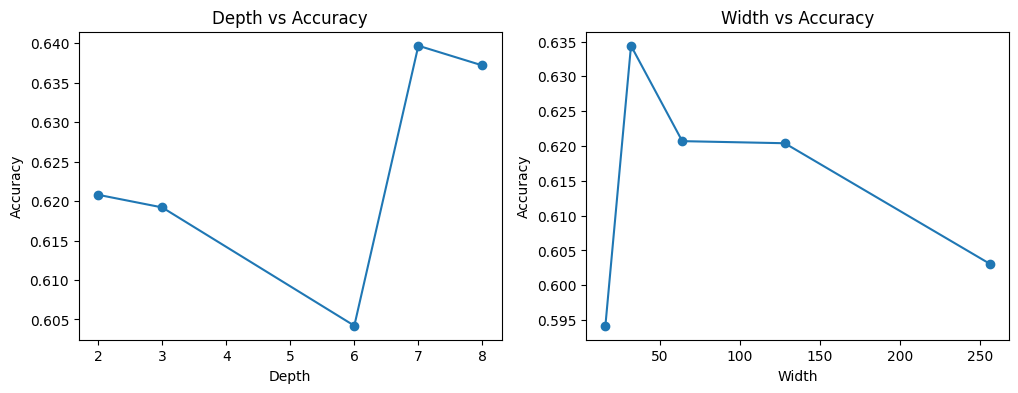

In [26]:
plt.figure(figsize=(12, 4))  # Figure size
plt.subplot(1, 2, 1)
plt.plot(depths, list(depth_results_1.values()), marker='o')
plt.title('Depth vs Accuracy')  # Title creation
plt.xlabel('Depth')  # X label
plt.ylabel('Accuracy')  # y -label

plt.subplot(1, 2, 2)
plt.plot(widths, list(width_results_1.values()), marker='o')
plt.title('Width vs Accuracy') # Title creation
plt.xlabel('Width')  #X label
plt.ylabel('Accuracy')  # Y label
plt.show()

In [32]:
load_final = '/content/drive/My Drive/best_model_cifar10_model.h5'
loaded_model_2 = load_model(load_final)
test_loss_2, test_acc_2 = loaded_model_2.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_2:.4f}")
print(f"Test Accuracy: {test_acc_2:.4f}")

Test Loss: 1.3214
Test Accuracy: 0.6674
